In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import openpyxl

## LIMPIEZA DE DATOS

In [45]:
data = pd.read_csv(
    r"C:\Users\Ulices Machine\Desktop\Octavo_Semestre\Taller de la Comunición Cientifica\dataset.csv",
    encoding='utf-8',
    sep=';'  # Especificar punto y coma como separador
)

print(f"Dimensiones correctas: {data.shape}")
print(data.head())

Dimensiones correctas: (552, 59)
   ID    Hora de inicio Hora de finalización  \
0   1  11/3/25 23:36:56     11/3/25 23:37:54   
1   2  11/4/25 12:02:48     11/4/25 12:06:17   
2   3  11/4/25 12:20:46     11/4/25 12:21:34   
3   4  11/4/25 12:36:40     11/4/25 12:38:41   
4   5  11/4/25 13:38:02     11/4/25 13:50:48   

                  Correo electrónico                         Nombre  \
0  alexander.ojeda@yachaytech.edu.ec  ALEXANDER PATRICIO OJEDA COBA   
1                          anonymous                            NaN   
2                          anonymous                            NaN   
3                          anonymous                            NaN   
4                          anonymous                            NaN   

   Total de puntos  Comentarios del cuestionario  \
0              NaN                           NaN   
1              NaN                           NaN   
2              NaN                           NaN   
3              NaN                         

In [46]:
data

,ID,Hora de inicio,Hora de finalización,Correo electrónico,Nombre,Total de puntos,Comentarios del cuestionario,Hora de la última modificación,Seleccione su rango de edad,Puntos: Seleccione su rango de edad,...,Puntos: ¿El siguiente video es Real o es una IA?7,¿El siguiente video es Real o es una IA?8,Comentarios: ¿El siguiente video es Real o es una IA?8,Puntos: ¿El siguiente video es Real o es una IA?8,¿El siguiente video es Real o es una IA?9,Comentarios: ¿El siguiente video es Real o es una IA?9,Puntos: ¿El siguiente video es Real o es una IA?9,¿El siguiente video es Real o es una IA?10,Comentarios: ¿El siguiente video es Real o es una IA?10,Puntos: ¿El siguiente video es Real o es una IA?10
0,1,11/3/25 23:36:56,11/3/25 23:37:54,alexander.ojeda@yachaytech.edu.ec,ALEXANDER PATRICIO OJEDA COBA,NaN,NaN,NaN,18-25,NaN,...,NaN,NaN,NaN,NaN,Real,NaN,NaN,NaN,NaN,NaN
1,2,11/4/25 12:02:48,11/4/25 12:06:17,anonymous,NaN,NaN,NaN,NaN,41-50,NaN,...,NaN,Real,NaN,NaN,Real,NaN,NaN,Real,NaN,NaN
2,3,11/4/25 12:20:46,11/4/25 12:21:34,anonymous,NaN,NaN,NaN,NaN,18-25,NaN,...,NaN,IA,NaN,NaN,IA,NaN,NaN,Real,NaN,NaN
3,4,11/4/25 12:36:40,11/4/25 12:38:41,anonymous,NaN,NaN,NaN,NaN,18-25,NaN,...,NaN,IA,NaN,NaN,IA,NaN,NaN,IA,NaN,NaN
4,5,11/4/25 13:38:02,11/4/25 13:50:48,anonymous,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,548,11/19/25 15:11:42,11/19/25 15:11:42,anonymous,NaN,NaN,NaN,NaN,31-40,NaN,...,NaN,IA,NaN,NaN,Real,NaN,NaN,IA,NaN,NaN
548,549,11/19/25 15:11:42,11/19/25 15:11:42,anonymous,NaN,NaN,NaN,NaN,31-40,NaN,...,NaN,IA,NaN,NaN,Real,NaN,NaN,IA,NaN,NaN
549,550,11/19/25 15:11:43,11/19/25 15:11:43,anonymous,NaN,NaN,NaN,NaN,31-40,NaN,...,NaN,IA,NaN,NaN,Real,NaN,NaN,IA,NaN,NaN
550,551,11/19/25 15:11:43,11/19/25 15:11:43,anonymous,NaN,NaN,NaN,NaN,31-40,NaN,...,NaN,IA,NaN,NaN,Real,NaN,NaN,IA,NaN,NaN


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 59 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   ID                                                                                                    552 non-null    int64  
 1   Hora de inicio                                                                                        552 non-null    object 
 2   Hora de finalización                                                                                  552 non-null    object 
 3   Correo electrónico                                                                                    552 non-null    object 
 4   Nombre                                                                                                1 

In [48]:
#Guardamos en un array las colummas con las posiciones 0,2,
categorical_cols = data.columns[[0,3,4,5,6,7,9,10,11,12,13,15,16,18,19,21,22,24,25,27,28,30,31,33,34,36,37,39,40,42,43,45,46,48,49,51,52,54,55,57,58]]
print("Columnas categóricas a eliminar:", categorical_cols.tolist())

Columnas categóricas a eliminar: ['ID', 'Correo electrónico', 'Nombre', 'Total de puntos', 'Comentarios del cuestionario', 'Hora de la última modificación', 'Puntos: Seleccione su rango de edad', 'Comentarios: Seleccione su rango de edad', 'Genero', 'Puntos: Genero', 'Comentarios: Genero', 'Puntos: ¿Con qué frecuencia usas redes sociales al día?', 'Comentarios: ¿Con qué frecuencia usas redes sociales al día?', 'Puntos: ¿Cuál\xa0redes sociales usas con más frecuencia?', 'Comentarios: ¿Cuál\xa0redes sociales usas con más frecuencia?', 'Puntos: ¿Estás informado sobre los videos generados con Inteligencia Artificial como deepfake?\xa0', 'Comentarios: ¿Estás informado sobre los videos generados con Inteligencia Artificial como deepfake?\xa0', 'Puntos: ¿Alguna vez has visto un video hecho por Inteligencia Artificial?\xa0', 'Comentarios: ¿Alguna vez has visto un video hecho por Inteligencia Artificial?\xa0', 'Puntos: ¿Sabes generar videos o imágenes con Inteligencia Artificial?\xa0', 'Comenta

In [49]:
#Eliminamos las columnas innecesarias por el número de su columna
data = data.drop(columns=categorical_cols)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 18 columns):
 #   Column                                                                                   Non-Null Count  Dtype 
---  ------                                                                                   --------------  ----- 
 0   Hora de inicio                                                                           552 non-null    object
 1   Hora de finalización                                                                     552 non-null    object
 2   Seleccione su rango de edad                                                              549 non-null    object
 3   ¿Con qué frecuencia usas redes sociales al día?                                          549 non-null    object
 4   ¿Cuál redes sociales usas con más frecuencia?                                            549 non-null    object
 5   ¿Estás informado sobre los videos generados con Inteligencia Artificial

In [51]:
#Contamos los valores nulos por columna
data.isnull().sum()

Hora de inicio                                                                              0
Hora de finalización                                                                        0
Seleccione su rango de edad                                                                 3
¿Con qué frecuencia usas redes sociales al día?                                             3
¿Cuál redes sociales usas con más frecuencia?                                               3
¿Estás informado sobre los videos generados con Inteligencia Artificial como deepfake?      3
¿Alguna vez has visto un video hecho por Inteligencia Artificial?                           3
¿Sabes generar videos o imágenes con Inteligencia Artificial?                               3
¿El siguiente video es Real o es una IA?                                                    4
¿El siguiente video es Real o es una IA?2                                                   4
¿El siguiente video es Real o es una IA?3                   

In [52]:
#Vemos que filas tienen valores nulos
null_rows = data[data.isnull().any(axis=1)]
print("Filas con valores nulos:")
print(null_rows)

Filas con valores nulos:
        Hora de inicio Hora de finalización Seleccione su rango de edad  \
0     11/3/25 23:36:56     11/3/25 23:37:54                       18-25   
4     11/4/25 13:38:02     11/4/25 13:50:48                         NaN   
6     11/4/25 16:25:48     11/4/25 16:32:13                         NaN   
22    11/6/25 15:07:28     11/6/25 15:13:27                       31-40   
32    11/6/25 15:09:22     11/6/25 15:15:22                       25-30   
62    11/6/25 15:24:34     11/6/25 15:30:33                       18-25   
85    11/6/25 16:24:40     11/6/25 16:30:40                       18-25   
99    11/6/25 17:31:14     11/6/25 17:37:14                       25-30   
147   11/6/25 22:51:27     11/6/25 22:57:26                       18-25   
167    11/7/25 9:15:16      11/7/25 9:21:20                       18-25   
171    11/7/25 7:49:55      11/7/25 9:42:59                       18-25   
176   11/7/25 10:15:49     11/7/25 10:21:48                       31-40   


In [53]:
#Eliminamos las filas con datos nulos
data = data.dropna()
data.shape

(532, 18)

In [54]:
#Contamos cuantos resultados hay por cada intervalo de edad
age_counts = data['Seleccione su rango de edad'].value_counts().sort_index()
age_counts

Seleccione su rango de edad
18-25    154
25-30     97
31-40    113
41-50    168
Name: count, dtype: int64

In [55]:
#Obtenemos algunas estadísticas descriptivas básicas
data.describe()

,Hora de inicio,Hora de finalización,Seleccione su rango de edad,¿Con qué frecuencia usas redes sociales al día?,¿Cuál redes sociales usas con más frecuencia?,¿Estás informado sobre los videos generados con Inteligencia Artificial como deepfake?,¿Alguna vez has visto un video hecho por Inteligencia Artificial?,¿Sabes generar videos o imágenes con Inteligencia Artificial?,¿El siguiente video es Real o es una IA?,¿El siguiente video es Real o es una IA?2,¿El siguiente video es Real o es una IA?3,¿El siguiente video es Real o es una IA?4,¿El siguiente video es Real o es una IA?5,¿El siguiente video es Real o es una IA?6,¿El siguiente video es Real o es una IA?7,¿El siguiente video es Real o es una IA?8,¿El siguiente video es Real o es una IA?9,¿El siguiente video es Real o es una IA?10
count,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532,532
unique,346,348,4,5,67,2,2,2,2,2,2,2,2,2,3,2,2,2
top,11/15/25 20:51:24,11/15/25 20:51:24,41-50,6-8 horas,Facebook;Instagram;,Si,Si,No,Real,IA,Real,Real,Real,Real,IA,IA,Real,Real
freq,6,6,168,212,79,451,400,390,289,298,474,283,326,324,386,321,426,295


In [56]:
#Vemos cuantos valores únicos hay por columna
unique_counts = data.nunique()
print("Cantidad de valores únicos por columna:")
print(unique_counts)

Cantidad de valores únicos por columna:
Hora de inicio                                                                             346
Hora de finalización                                                                       348
Seleccione su rango de edad                                                                  4
¿Con qué frecuencia usas redes sociales al día?                                              5
¿Cuál redes sociales usas con más frecuencia?                                               67
¿Estás informado sobre los videos generados con Inteligencia Artificial como deepfake?       2
¿Alguna vez has visto un video hecho por Inteligencia Artificial?                            2
¿Sabes generar videos o imágenes con Inteligencia Artificial?                                2
¿El siguiente video es Real o es una IA?                                                     2
¿El siguiente video es Real o es una IA?2                                                    2
¿El siguie

In [57]:
# Ubicamos la fila que tiene un valor atípico diferente de Real o IA en la columna '¿El siguiente video es Real o es una IA?7'
outlier_row = data[~data['¿El siguiente video es Real o es una IA?7'].isin(['Real', 'IA'])]
print("Fila con valor atípico en la columna '¿El siguiente video es Real o es una IA?7':")
outlier_row
#Eliminamos la fila outlier_row
data = data.drop(outlier_row.index)

Fila con valor atípico en la columna '¿El siguiente video es Real o es una IA?7':


In [58]:
#Vemos cuantos valores únicos hay por columna
unique_counts = data.nunique()
print("Cantidad de valores únicos por columna:")
print(unique_counts)

Cantidad de valores únicos por columna:
Hora de inicio                                                                             345
Hora de finalización                                                                       347
Seleccione su rango de edad                                                                  4
¿Con qué frecuencia usas redes sociales al día?                                              5
¿Cuál redes sociales usas con más frecuencia?                                               67
¿Estás informado sobre los videos generados con Inteligencia Artificial como deepfake?       2
¿Alguna vez has visto un video hecho por Inteligencia Artificial?                            2
¿Sabes generar videos o imágenes con Inteligencia Artificial?                                2
¿El siguiente video es Real o es una IA?                                                     2
¿El siguiente video es Real o es una IA?2                                                    2
¿El siguie

In [59]:
#Nombre de las columnas restantes
print("Columnas restantes en el DataFrame:")
print(data.columns.tolist())

Columnas restantes en el DataFrame:
['Hora de inicio', 'Hora de finalización', 'Seleccione su rango de edad', '¿Con qué frecuencia usas redes sociales al día?', '¿Cuál\xa0redes sociales usas con más frecuencia?', '¿Estás informado sobre los videos generados con Inteligencia Artificial como deepfake?\xa0', '¿Alguna vez has visto un video hecho por Inteligencia Artificial?\xa0', '¿Sabes generar videos o imágenes con Inteligencia Artificial?\xa0', '¿El siguiente video es Real o es una IA?', '¿El siguiente video es Real o es una IA?2', '¿El siguiente video es Real o es una IA?3', '¿El siguiente video es Real o es una IA?4', '¿El siguiente video es Real o es una IA?5', '¿El siguiente video es Real o es una IA?6', '¿El siguiente video es Real o es una IA?7', '¿El siguiente video es Real o es una IA?8', '¿El siguiente video es Real o es una IA?9', '¿El siguiente video es Real o es una IA?10']


In [60]:
#Codificamos las columnas categóricas con "Si" y "No" a 0 y 1
def encode_categorical_columns1(df, column_names):
    """
    Codifica columnas categóricas con valores 'Si' y 'No' a 0 y 1
    
    Args:
        df: DataFrame de pandas
        column_names: lista de nombres de columnas a codificar
    
    Returns:
        DataFrame con columnas codificadas
    """
    
    # Crear copia para no modificar el original
    df_encoded = df.copy()
    
    # Mapeo específico
    mapping = {'Si': 0, 'No': 1}
    
    for col in column_names:
        if col in df_encoded.columns:
            # Verificar si la columna existe
            df_encoded[col] = df_encoded[col].map(mapping)
            
            # Verificar si hay valores nulos (valores no mapeados)
            null_count = df_encoded[col].isnull().sum()
            if null_count > 0:
                print(f"Advertencia: {null_count} valores en '{col}' no pudieron ser mapeados")
        else:
            print(f"Advertencia: Columna '{col}' no encontrada en el DataFrame")
    
    return df_encoded
columas_codificar = ['¿Estás informado sobre los videos generados con Inteligencia Artificial como deepfake?\xa0', '¿Alguna vez has visto un video hecho por Inteligencia Artificial?\xa0', '¿Sabes generar videos o imágenes con Inteligencia Artificial?\xa0']
data = encode_categorical_columns1(data, columas_codificar)

In [61]:
#Codificamos las columnas categóricas con 'IA' y 'Real' a 0 y 1
def encode_categorical_columns(df, column_names):
    """
    Codifica columnas categóricas con valores 'IA' y 'Real' a 0 y 1
    
    Args:
        df: DataFrame de pandas
        column_names: lista de nombres de columnas a codificar
    
    Returns:
        DataFrame con columnas codificadas
    """
    
    # Crear copia para no modificar el original
    df_encoded = df.copy()
    
    # Mapeo específico
    mapping = {'IA': 0, 'Real': 1}
    
    for col in column_names:
        if col in df_encoded.columns:
            # Verificar si la columna existe
            df_encoded[col] = df_encoded[col].map(mapping)
            
            # Verificar si hay valores nulos (valores no mapeados)
            null_count = df_encoded[col].isnull().sum()
            if null_count > 0:
                print(f"Advertencia: {null_count} valores en '{col}' no pudieron ser mapeados")
        else:
            print(f"Advertencia: Columna '{col}' no encontrada en el DataFrame")
    
    return df_encoded

# Uso de la función
# Suponiendo que tus columnas se llaman 'tipo1', 'tipo2', 'tipo3'
columnas_a_codificar = ['¿El siguiente video es Real o es una IA?', '¿El siguiente video es Real o es una IA?2', '¿El siguiente video es Real o es una IA?3', '¿El siguiente video es Real o es una IA?4', '¿El siguiente video es Real o es una IA?5', '¿El siguiente video es Real o es una IA?6', '¿El siguiente video es Real o es una IA?7', '¿El siguiente video es Real o es una IA?8', '¿El siguiente video es Real o es una IA?9', '¿El siguiente video es Real o es una IA?10']
df_codificado = encode_categorical_columns(data, columnas_a_codificar)


In [62]:
df_codificado

,Hora de inicio,Hora de finalización,Seleccione su rango de edad,¿Con qué frecuencia usas redes sociales al día?,¿Cuál redes sociales usas con más frecuencia?,¿Estás informado sobre los videos generados con Inteligencia Artificial como deepfake?,¿Alguna vez has visto un video hecho por Inteligencia Artificial?,¿Sabes generar videos o imágenes con Inteligencia Artificial?,¿El siguiente video es Real o es una IA?,¿El siguiente video es Real o es una IA?2,¿El siguiente video es Real o es una IA?3,¿El siguiente video es Real o es una IA?4,¿El siguiente video es Real o es una IA?5,¿El siguiente video es Real o es una IA?6,¿El siguiente video es Real o es una IA?7,¿El siguiente video es Real o es una IA?8,¿El siguiente video es Real o es una IA?9,¿El siguiente video es Real o es una IA?10
2,11/4/25 12:20:46,11/4/25 12:21:34,18-25,6-8 horas,Tiktok;Facebook;Instagram;Whatsapp;,0,0,0,1,1,0,1,1,0,0,0,0,1
3,11/4/25 12:36:40,11/4/25 12:38:41,18-25,4-6 horas,Facebook;,0,0,0,0,0,1,0,1,0,1,0,0,0
5,11/4/25 16:20:54,11/4/25 16:23:12,18-25,2-4 horas,Instagram;Whatsapp;Facebook;,0,0,1,1,1,1,1,0,0,1,1,1,0
7,11/4/25 17:01:37,11/4/25 17:04:51,18-25,2-4 horas,Instagram;Whatsapp;,0,0,0,1,1,1,1,1,0,0,0,1,0
8,11/4/25 17:20:36,11/4/25 17:22:45,18-25,6-8 horas,Facebook;Instagram;Whatsapp;,0,0,0,1,0,1,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,11/19/25 15:11:42,11/19/25 15:11:42,31-40,6-8 horas,Facebook;Tiktok;Whatsapp;X;Otras;,0,0,1,1,0,0,1,1,0,0,0,1,0
548,11/19/25 15:11:42,11/19/25 15:11:42,31-40,6-8 horas,Facebook;Tiktok;Whatsapp;X;Otras;,0,0,1,1,0,0,1,1,0,0,0,1,0
549,11/19/25 15:11:43,11/19/25 15:11:43,31-40,6-8 horas,Facebook;Tiktok;Whatsapp;X;Otras;,0,0,1,1,0,0,1,1,0,0,0,1,0
550,11/19/25 15:11:43,11/19/25 15:11:43,31-40,6-8 horas,Facebook;Tiktok;Whatsapp;X;Otras;,0,0,1,1,0,0,1,1,0,0,0,1,0


In [63]:
col = 'Seleccione su rango de edad'
col_data = df_codificado[col].copy()

In [64]:
col_data.shape
col_encoded = pd.get_dummies(col_data, prefix=col, drop_first=False)

In [65]:
index=df_codificado.index
df_codificado = df_codificado.drop(columns=[col])
df_codificado = pd.concat([df_codificado, col_encoded], axis=1)

In [66]:
# Cambiamos de true/false a 1/0
df_codificado.replace({True: 1, False: 0}, inplace=True)

C:\Users\Ulices Machine\AppData\Local\Temp\ipykernel_24228\2647442859.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_codificado.replace({True: 1, False: 0}, inplace=True)


In [67]:
#Realizamos el mismo procedimiento para la columna '¿Con qué frecuencia consumes contenido en video generado por IA?'
col1 = '¿Con qué frecuencia usas redes sociales al día?'
col_data1 = df_codificado[col1].copy()
col_encoded1 = pd.get_dummies(col_data1, prefix=col1, drop_first=False)

In [68]:
index=df_codificado.index
df_codificado = df_codificado.drop(columns=[col1])

In [69]:
df_codificado = pd.concat([df_codificado, col_encoded1], axis=1)

In [70]:
# Cambiamos de true/false a 1/0
df_codificado.replace({True: 1, False: 0}, inplace=True)

C:\Users\Ulices Machine\AppData\Local\Temp\ipykernel_24228\2647442859.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_codificado.replace({True: 1, False: 0}, inplace=True)


In [71]:
df_codificado["rrss_list"] = df_codificado['¿Cuál\xa0redes sociales usas con más frecuencia?'].fillna("").str.split(";")
df_codificado["rrss_list"] = df_codificado["rrss_list"].apply(lambda x: [i.strip() for i in x if i.strip() != ""])
df_codificado = df_codificado.drop(columns=['¿Cuál\xa0redes sociales usas con más frecuencia?'])

In [72]:
#Extraemos las columnas a encodificar con MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
encoded_rrss = mlb.fit_transform(df_codificado['rrss_list'])
df_encoded = pd.DataFrame(encoded_rrss, columns=[f"rrss_{c}" for c in mlb.classes_])

In [73]:
# Unimos los dataframes
index=df_codificado.index
df_codificado = pd.concat([df_codificado, df_encoded], axis=1)
#Eliminamos las filas vacías
df_codificado = df_codificado.dropna()
df_codificado = df_codificado.drop(columns=['rrss_list'])   

In [74]:
df = df_codificado.copy()

In [75]:
# Método 1: Usando str.split (recomendado para tu formato)
df[['Fecha_inicio', 'Hora_inicio']] = df['Hora de inicio'].str.split(' ', expand=True)
df[["Fecha_final", "Hora_final"]] = df['Hora de finalización'].str.split(' ', expand=True)
print("Después de separar fecha y hora:")
#Eliminamos las columnas originales de fecha y hora
df = df.drop(columns=['Hora de inicio', 'Hora de finalización'])
df = df.drop(columns=["Fecha_inicio", "Fecha_final"])
#Ubicamos las columnas Hora_inicio y Hora_final al inicio del DataFrame
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Hora_inicio')))
cols.insert(1, cols.pop(cols.index('Hora_final')))
df = df[cols]
df

Después de separar fecha y hora:


,Hora_inicio,Hora_final,¿Estás informado sobre los videos generados con Inteligencia Artificial como deepfake?,¿Alguna vez has visto un video hecho por Inteligencia Artificial?,¿Sabes generar videos o imágenes con Inteligencia Artificial?,¿El siguiente video es Real o es una IA?,¿El siguiente video es Real o es una IA?2,¿El siguiente video es Real o es una IA?3,¿El siguiente video es Real o es una IA?4,¿El siguiente video es Real o es una IA?5,...,¿Con qué frecuencia usas redes sociales al día?_4-6 horas,¿Con qué frecuencia usas redes sociales al día?_6-8 horas,¿Con qué frecuencia usas redes sociales al día?_8-10 horas,¿Con qué frecuencia usas redes sociales al día?_más de 10 horas,rrss_Facebook,rrss_Instagram,rrss_Otras,rrss_Tiktok,rrss_Whatsapp,rrss_X
2,12:20:46,12:21:34,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,12:36:40,12:38:41,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,16:20:54,16:23:12,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
7,17:01:37,17:04:51,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
8,17:20:36,17:22:45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,15:10:47,15:10:47,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
527,15:10:48,15:10:48,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
528,15:10:48,15:10:48,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
529,15:10:48,15:10:48,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [76]:
# Convertir a datetime para mayor flexibilidad
df['Hora_inicio'] = pd.to_datetime(df['Hora_inicio'], format='%H:%M:%S')
df['Hora_final'] = pd.to_datetime(df['Hora_final'], format='%H:%M:%S')
#Calculamos la duración en segundos
df['Duración_segundos'] = (df['Hora_final'] - df['Hora_inicio']).dt.total_seconds()
#Eliminamos las columnas originales de fecha y hora
df = df.drop(columns=['Hora_inicio', 'Hora_final'])

In [77]:
#Ubicamos la columna Duración_segundos al inicio del DataFrame
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Duración_segundos')))
df = df[cols]
df

,Duración_segundos,¿Estás informado sobre los videos generados con Inteligencia Artificial como deepfake?,¿Alguna vez has visto un video hecho por Inteligencia Artificial?,¿Sabes generar videos o imágenes con Inteligencia Artificial?,¿El siguiente video es Real o es una IA?,¿El siguiente video es Real o es una IA?2,¿El siguiente video es Real o es una IA?3,¿El siguiente video es Real o es una IA?4,¿El siguiente video es Real o es una IA?5,¿El siguiente video es Real o es una IA?6,...,¿Con qué frecuencia usas redes sociales al día?_4-6 horas,¿Con qué frecuencia usas redes sociales al día?_6-8 horas,¿Con qué frecuencia usas redes sociales al día?_8-10 horas,¿Con qué frecuencia usas redes sociales al día?_más de 10 horas,rrss_Facebook,rrss_Instagram,rrss_Otras,rrss_Tiktok,rrss_Whatsapp,rrss_X
2,48.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,121.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,138.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
7,194.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
8,129.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
527,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
528,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
529,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [78]:
#Vemos los valores únicos de cada columna
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Columna: {column}")
    print(f"Valores únicos ({len(unique_values)}): {unique_values}\n")

Columna: Duración_segundos
Valores únicos (164): [ 48. 121. 138. 194. 129. 216.  42. 162.  62. 168. 212. 231. 225. 227.
 145. 143. 229. 251. 360. 219. 217. 232. 144. 245. 127. 318.  77. 329.
 167. 350. 197. 325. 195. 199. 205. 335. 149. 150.  84. 269. 220. 224.
 198. 257. 275. 260.  87. 196. 147. 215. 279. 288. 175. 207. 166. 233.
 186. 337. 348. 164. 270. 262. 294. 241. 120. 237. 208. 226. 298. 265.
 218. 326. 342. 355. 154. 221. 240. 123. 203. 315. 222. 302.  56. 192.
 210. 157.  96. 163. 118. 114. 261. 184. 191. 173. 153. 344. 102. 124.
 314. 248. 214. 266.  70. 119. 277. 235. 204. 142. 253. 111. 267. 242.
 117. 202. 170. 110. 316. 165. 178. 206. 228. 246. 180. 238. 284. 343.
 354. 280. 230. 171. 299. 254. 211. 301. 322. 161. 274. 290. 321. 249.
 181. 155.  39.  38.  29.  34.  28.  32.  33.  90.   0.  35.  97. 158.
 250. 281.  40.  37.  86. 106.  27.   5.   7.   3.]

Columna: ¿Estás informado sobre los videos generados con Inteligencia Artificial como deepfake? 
Valores únicos (2): 

### Imputar datos

In [79]:
# Sacamos el promedio de duración los que tienen duración mayor a 0
promedio_duracion = df[df['Duración_segundos'] > 0]['Duración_segundos'].mean()
promedio_duracion
#Vamos a cambiar los valores del tiempo igual a 0 por el promedio más un número aleatorio 
df['Duración_segundos'] = df['Duración_segundos'].apply(lambda x: promedio_duracion + np.random.randint(-45, 45) if x == 0 else x)

In [80]:
df.columns.tolist()

['Duración_segundos',
 '¿Estás informado sobre los videos generados con Inteligencia Artificial como deepfake?\xa0',
 '¿Alguna vez has visto un video hecho por Inteligencia Artificial?\xa0',
 '¿Sabes generar videos o imágenes con Inteligencia Artificial?\xa0',
 '¿El siguiente video es Real o es una IA?',
 '¿El siguiente video es Real o es una IA?2',
 '¿El siguiente video es Real o es una IA?3',
 '¿El siguiente video es Real o es una IA?4',
 '¿El siguiente video es Real o es una IA?5',
 '¿El siguiente video es Real o es una IA?6',
 '¿El siguiente video es Real o es una IA?7',
 '¿El siguiente video es Real o es una IA?8',
 '¿El siguiente video es Real o es una IA?9',
 '¿El siguiente video es Real o es una IA?10',
 'Seleccione su rango de edad_18-25',
 'Seleccione su rango de edad_25-30',
 'Seleccione su rango de edad_31-40',
 'Seleccione su rango de edad_41-50',
 '¿Con qué frecuencia usas redes sociales al día?_2-4 horas',
 '¿Con qué frecuencia usas redes sociales al día?_4-6 horas',
 '¿

## MODELO DE REGRESIÓN LOGISTICA

In [ ]:
#'IA' y 'Real' a 0 y 1
#Cargamos el dataset limpio
#df = pd.read_csv(r"C:\Users\Ulices Machine\Desktop\Octavo_Semestre\Taller de la Comunición Cientifica\dataset_limpio.csv",
#    encoding='utf-8',
#    sep=';'  # Especificar punto y coma como separador
#)
#
#print(f"Dimensiones correctas: {df.shape}")
#print(df.head())

Dimensiones correctas: (510, 29)
   Duración_segundos  \
0               48.0   
1              121.0   
2              138.0   
3              194.0   
4              129.0   

   ¿Estás informado sobre los videos generados con Inteligencia Artificial como deepfake?   \
0                                                0.0                                         
1                                                0.0                                         
2                                                0.0                                         
3                                                0.0                                         
4                                                0.0                                         

   ¿Alguna vez has visto un video hecho por Inteligencia Artificial?   \
0                                                0.0                    
1                                                0.0                    
2                                     

In [83]:
df.columns.to_list()

['Duración_segundos',
 '¿Estás informado sobre los videos generados con Inteligencia Artificial como deepfake?\xa0',
 '¿Alguna vez has visto un video hecho por Inteligencia Artificial?\xa0',
 '¿Sabes generar videos o imágenes con Inteligencia Artificial?\xa0',
 '¿El siguiente video es Real o es una IA?',
 '¿El siguiente video es Real o es una IA?2',
 '¿El siguiente video es Real o es una IA?3',
 '¿El siguiente video es Real o es una IA?4',
 '¿El siguiente video es Real o es una IA?5',
 '¿El siguiente video es Real o es una IA?6',
 '¿El siguiente video es Real o es una IA?7',
 '¿El siguiente video es Real o es una IA?8',
 '¿El siguiente video es Real o es una IA?9',
 '¿El siguiente video es Real o es una IA?10',
 'Seleccione su rango de edad_18-25',
 'Seleccione su rango de edad_25-30',
 'Seleccione su rango de edad_31-40',
 'Seleccione su rango de edad_41-50',
 '¿Con qué frecuencia usas redes sociales al día?_2-4 horas',
 '¿Con qué frecuencia usas redes sociales al día?_4-6 horas',
 '¿

In [84]:
#Cambiamos en nombre de las columnas para una mejor visualización
new_name = ["Time(sec)","know about AI-generated videos?","Watch AI-generated videos?","Making AI videos?","Question 1","Question 2","Question 3","Question 4","Question 5","Question 6",
"Question 7","Question 8","Question 9","Question 10","Age_18-25","Age_26-30","Age_31-40","Age_41-50","freq_2-4h","freq_4-6h","freq_6-8h","freq_8-10h",
"more 10h",'rrss_Facebook','rrss_Instagram','rrss_Otras','rrss_Tiktok','rrss_Whatsapp','rrss_X']
# Verificar que coinciden las longitudes
if len(df.columns) == len(new_name):
    df.columns = new_name
    print("✅ Nombres cambiados exitosamente")
else:
    print(f"⚠️  Error: El DataFrame tiene {len(df.columns)} columnas, pero se proporcionaron {len(new_name)} nombres")
    print("Columnas actuales:", df.columns.tolist())

✅ Nombres cambiados exitosamente


In [85]:
# Creamos un df un array con las respuestas correctas
respuestas_correctas = [1,0,1,1,1,0,0,0,1,0]
ia_cols = [
    'Question 1',
    'Question 2',
    'Question 3',
    'Question 4',
    'Question 5',
    'Question 6',
    'Question 7',
    'Question 8',
    'Question 9',
    'Question 10'
]
assert len(respuestas_correctas) == len(ia_cols), "El número de respuestas no coincide con el número de videos."

# Crear nuevas columnas con aciertos (1) y errores (0)
for col, correcta in zip(ia_cols, respuestas_correctas):
    df[col + "_acierto"] = (df[col] == correcta).astype(int)

# Si deseas reemplazar las columnas originales:
for col, correcta in zip(ia_cols, respuestas_correctas):
    df[col] = (df[col] == correcta).astype(int)

# Guardar archivo actualizado
df.to_csv("dataset_con_aciertos.csv", index=False)

print("Conversión completa. Las columnas ahora representan: 1 = Acierto, 0 = Error.")

Conversión completa. Las columnas ahora representan: 1 = Acierto, 0 = Error.


In [86]:
#Eliminamos las columnas de las preguntas originales
df = df.drop(columns=ia_cols)

In [87]:
df.columns.to_list()

['Time(sec)',
 'know about AI-generated videos?',
 'Watch AI-generated videos?',
 'Making AI videos?',
 'Age_18-25',
 'Age_26-30',
 'Age_31-40',
 'Age_41-50',
 'freq_2-4h',
 'freq_4-6h',
 'freq_6-8h',
 'freq_8-10h',
 'more 10h',
 'rrss_Facebook',
 'rrss_Instagram',
 'rrss_Otras',
 'rrss_Tiktok',
 'rrss_Whatsapp',
 'rrss_X',
 'Question 1_acierto',
 'Question 2_acierto',
 'Question 3_acierto',
 'Question 4_acierto',
 'Question 5_acierto',
 'Question 6_acierto',
 'Question 7_acierto',
 'Question 8_acierto',
 'Question 9_acierto',
 'Question 10_acierto']

In [88]:
#Recordemos que en las columnas de respuesta sobre IA 0 representa conoce y 1 representa no conoce.
#Entonces invertimos para que sea intuitivo el modelo
knowledge_cols = [
    'know about AI-generated videos?',
    'Watch AI-generated videos?',
    'Making AI videos?'
]

for col in knowledge_cols:
    df[col] = df[col].apply(lambda x: 1 - x)

In [89]:
# Identificar todas las columnas que terminan en "_acierto" (aciertos por video)
acierto_cols = [c for c in df.columns if c.endswith("_acierto")]

# Calcular accuracy total como promedio de aciertos
df["accuracy_total"] = df[acierto_cols].mean(axis=1)

df["accuracy_total"].head()

2    0.6
3    0.6
5    0.6
7    0.9
8    0.7
Name: accuracy_total, dtype: float64

In [90]:
#Creamos la variable objetivo para el modelo
#1 = Buen detector (accuracy_total ≥ 0.6)
#0 = Mal detector (accuracy_total < 0.6)

df["good_detector"] = (df["accuracy_total"] >= 0.6).astype(int)

df[["accuracy_total", "good_detector"]].head()


,accuracy_total,good_detector
2,0.6,1
3,0.6,1
5,0.6,1
7,0.9,1
8,0.7,1


In [91]:
# Conocimiento IA

knowledge_cols = [
    'know about AI-generated videos?',
    'Watch AI-generated videos?',
    'Making AI videos?'
]

# Rangos de edad
age_cols = [
    'Age_18-25',
    'Age_26-30',
    'Age_31-40',
    'Age_41-50'
]

# Frecuencia RRSS
freq_cols = [c for c in df.columns if "¿Con qué frecuencia usas redes sociales al día?" in c]

# Redes sociales usadas
rrss_cols = [c for c in df.columns if c.startswith("rrss_")]




In [104]:
#Modelamos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


X_binarias = df[knowledge_cols + age_cols + freq_cols + rrss_cols]
X_continuas = df[["Time(sec)"]]

scaler = StandardScaler()
X_continuas_scaled = scaler.fit_transform(X_continuas)
y = df["good_detector"]
# Reconstruir X final
X = np.concatenate([X_binarias.values, X_continuas_scaled], axis=1)

# ================
# 6. Train-test split
# ================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# ================
# 7. Modelo Logístico equilibrado
# ================
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',   # 🔥 clave para evitar modelo mono-clase
    solver='liblinear'         # 🔥 robusto para datos binarios
)

model.fit(X_train, y_train)

# ============


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [105]:
from sklearn.metrics import classification_report

print("\n=== CLASSIFICATION REPORT ===\n")
print(classification_report(y_test, model.predict(X_test)))


=== CLASSIFICATION REPORT ===

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        63
           1       0.88      0.93      0.90        90

    accuracy                           0.88       153
   macro avg       0.88      0.87      0.88       153
weighted avg       0.88      0.88      0.88       153



In [106]:
X

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         0.        , -2.54645001],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         0.        , -1.31650446],
       [ 1.        ,  1.        ,  0.        , ...,  1.        ,
         0.        , -1.03007878],
       ...,
       [ 1.        ,  1.        ,  0.        , ...,  1.        ,
         1.        ,  0.52887989],
       [ 1.        ,  1.        ,  0.        , ...,  1.        ,
         1.        ,  0.04027138],
       [ 1.        ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.1413628 ]], shape=(510, 19))

In [107]:
import pandas as pd
import numpy as np

# Lista de columnas binarias usadas en X (debe corresponder al orden de X_binarias en tu código)
knowledge_cols = [
    'know about AI-generated videos?',
    'Watch AI-generated videos?',
    'Making AI videos?'
]

age_cols = [
    'Age_18-25',
    'Age_26-30',
    'Age_31-40',
    'Age_41-50'
]

freq_cols = [
    'freq_2-4h',
    'freq_4-6h',
    'freq_6-8h',
    'freq_8-10h',
    'more 10h'
]

rrss_cols = [
    'rrss_Facebook',
    'rrss_Instagram',
    'rrss_Otras',
    'rrss_Tiktok',
    'rrss_Whatsapp',
    'rrss_X'
]

# Esta es la lista EXACTA de columnas usadas en el modelo (en orden correcto)
columnas_modelo = knowledge_cols + age_cols + freq_cols + rrss_cols + ["Time(sec)"]

# Extraer coeficientes del modelo ya entrenado
coeficientes = pd.DataFrame({
    "variable": columnas_modelo,
    "coeficiente": model.coef_[0],
})

# Calcular impacto absoluto
coeficientes["impacto_absoluto"] = coeficientes["coeficiente"].abs()

# Ordenar de mayor a menor
coef_ordenados = coeficientes.sort_values(by="impacto_absoluto", ascending=False)

print("\n=== IMPORTANCIA DE VARIABLES (ORDENADAS) ===\n")
print(coef_ordenados)



=== IMPORTANCIA DE VARIABLES (ORDENADAS) ===

                           variable  coeficiente  impacto_absoluto
6                         Age_41-50    -2.345295          2.345295
1        Watch AI-generated videos?     2.168060          2.168060
4                         Age_26-30     1.535814          1.535814
17                           rrss_X     1.377303          1.377303
7                         freq_2-4h     1.173845          1.173845
10                       freq_8-10h    -1.094553          1.094553
2                 Making AI videos?     0.902521          0.902521
9                         freq_6-8h    -0.854768          0.854768
15                      rrss_Tiktok    -0.773590          0.773590
11                         more 10h     0.600581          0.600581
13                   rrss_Instagram     0.323452          0.323452
8                         freq_4-6h    -0.318518          0.318518
5                         Age_31-40     0.257995          0.257995
16             

In [108]:
len(columnas_modelo)

19

In [109]:
len(model.coef_[0])

19

## Representación Gráfica

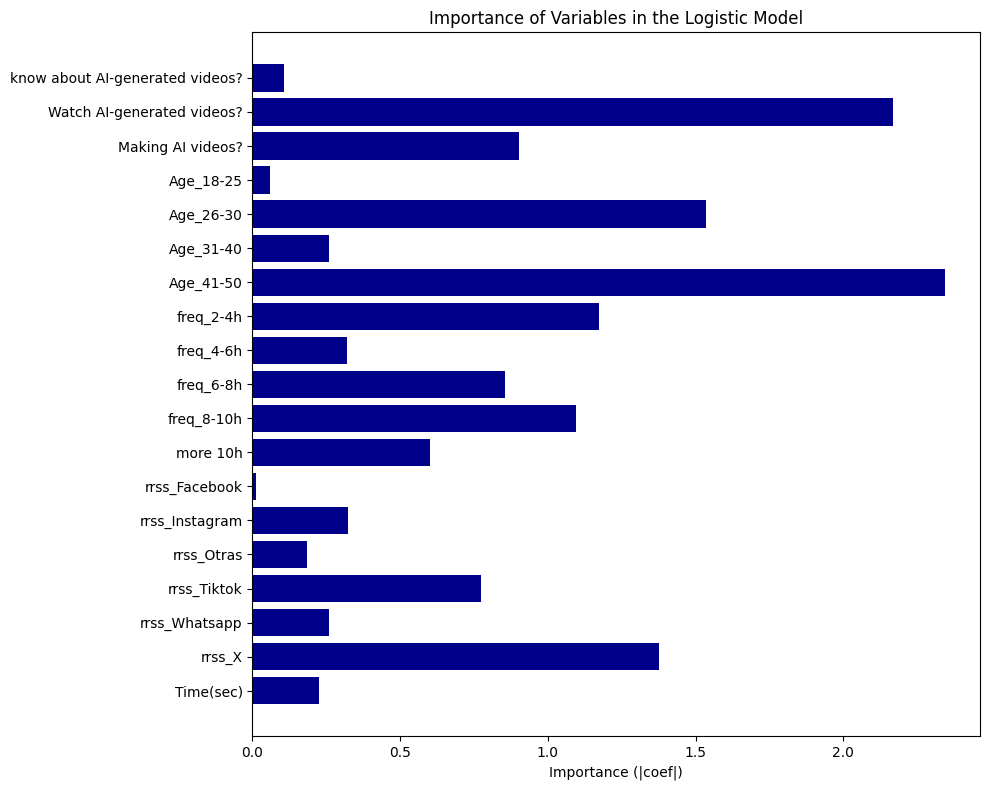

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# coef_df debe contener tu tabla de coeficientes
plt.figure(figsize=(10, 8))
plt.barh(coeficientes["variable"], coeficientes["impacto_absoluto"], color="darkblue")
plt.xlabel("Importance (|coef|)")
plt.title("Importance of Variables in the Logistic Model")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

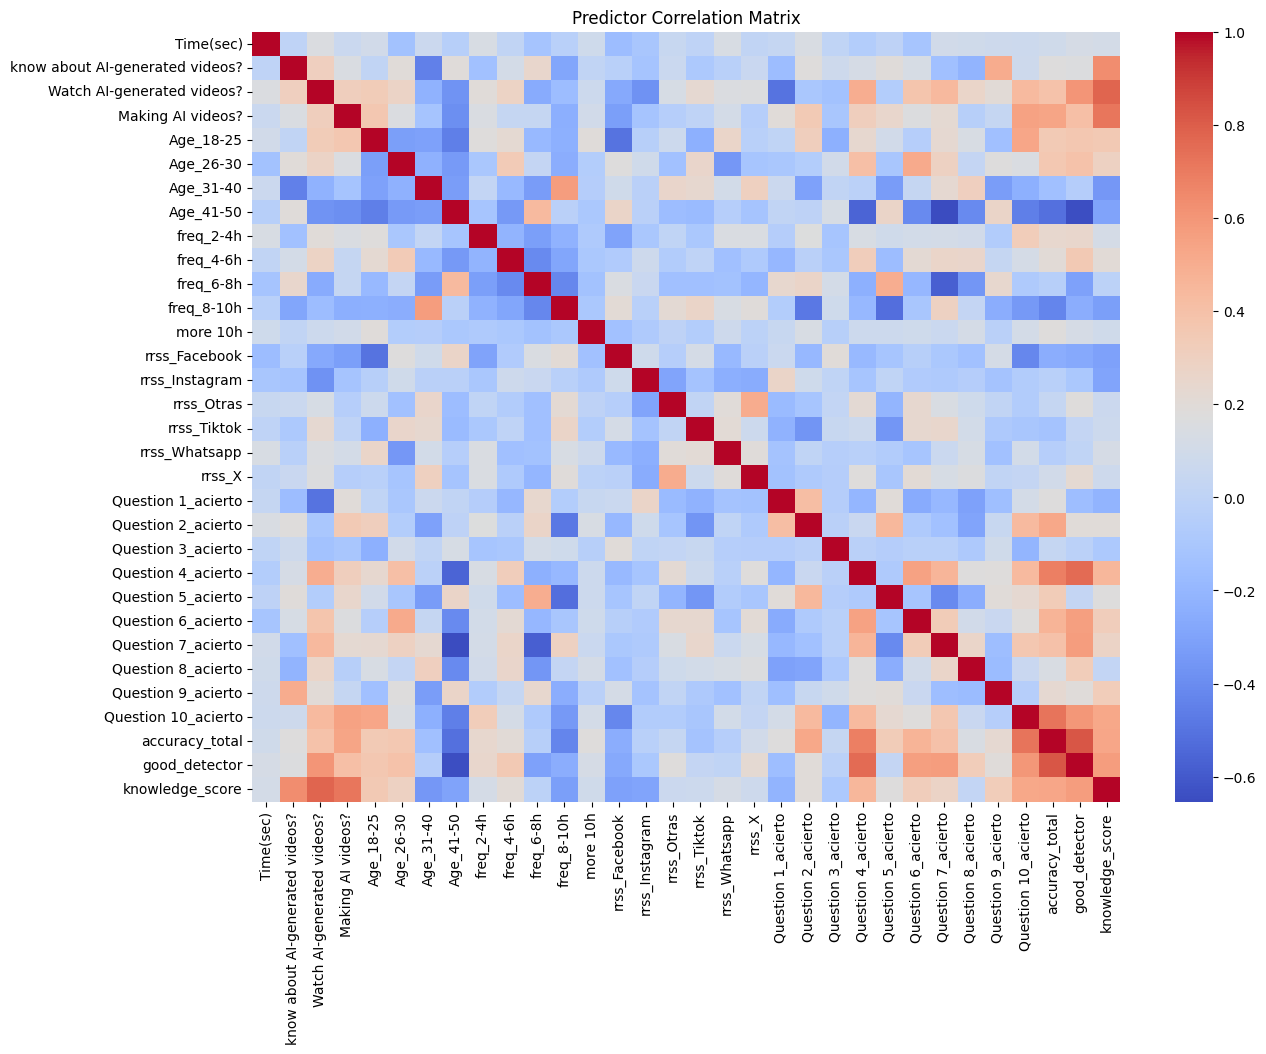

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Predictor Correlation Matrix")
plt.show()


In [129]:
def encontrar_multicolinealidad(df, umbral=0.8):
    """
    Encuentra variables altamente correlacionadas (problema de multicolinealidad)
    """
    corr_matrix = df.corr()
    
    print(f"🚨 VARIABLES ALTAMENTE CORRELACIONADAS (≥ {umbral}):")
    
    variables_problema = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) >= umbral:
                variables_problema.append({
                    'Variable 1': corr_matrix.columns[i],
                    'Variable 2': corr_matrix.columns[j],
                    'Correlación': corr_val
                })
                print(f"   {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_val:.3f}")
    
    if not variables_problema:
        print(f"   No se encontraron variables con correlación ≥ {umbral}")
    
    return variables_problema

# Buscar multicolinealidad
variables_multicolineales = encontrar_multicolinealidad(df, umbral=0.8)

🚨 VARIABLES ALTAMENTE CORRELACIONADAS (≥ 0.8):
   accuracy_total ↔ good_detector: 0.820


In [130]:
# Análisis rápido y directo
corr_matrix = df.corr()

print("🎯 CORRELACIONES MÁS IMPORTANTES:")
print("=" * 50)

# Top 5 correlaciones positivas y negativas
top_positivas = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
top_negativas = corr_matrix.unstack().sort_values(ascending=True).drop_duplicates()

print("\n🏆 TOP 5 CORRELACIONES POSITIVAS:")
for i, ((var1, var2), valor) in enumerate(top_positivas.head(6).items()):
    if var1 != var2:  # Excluir autocorrelaciones
        print(f"   {var1} ↔ {var2}: {valor:.3f}")

print("\n📉 TOP 5 CORRELACIONES NEGATIVAS:")
for i, ((var1, var2), valor) in enumerate(top_negativas.head(6).items()):
    if var1 != var2:  # Excluir autocorrelaciones
        print(f"   {var1} ↔ {var2}: {valor:.3f}")

🎯 CORRELACIONES MÁS IMPORTANTES:

🏆 TOP 5 CORRELACIONES POSITIVAS:
   accuracy_total ↔ good_detector: 0.820
   knowledge_score ↔ Watch AI-generated videos?: 0.775
   Question 4_acierto ↔ good_detector: 0.760
   accuracy_total ↔ Question 10_acierto: 0.728
   knowledge_score ↔ Making AI videos?: 0.717

📉 TOP 5 CORRELACIONES NEGATIVAS:
   Age_41-50 ↔ Question 7_acierto: -0.653
   Age_41-50 ↔ good_detector: -0.644
   Question 7_acierto ↔ freq_6-8h: -0.578
   Question 4_acierto ↔ Age_41-50: -0.561
   Question 5_acierto ↔ freq_8-10h: -0.520
   Age_41-50 ↔ accuracy_total: -0.516


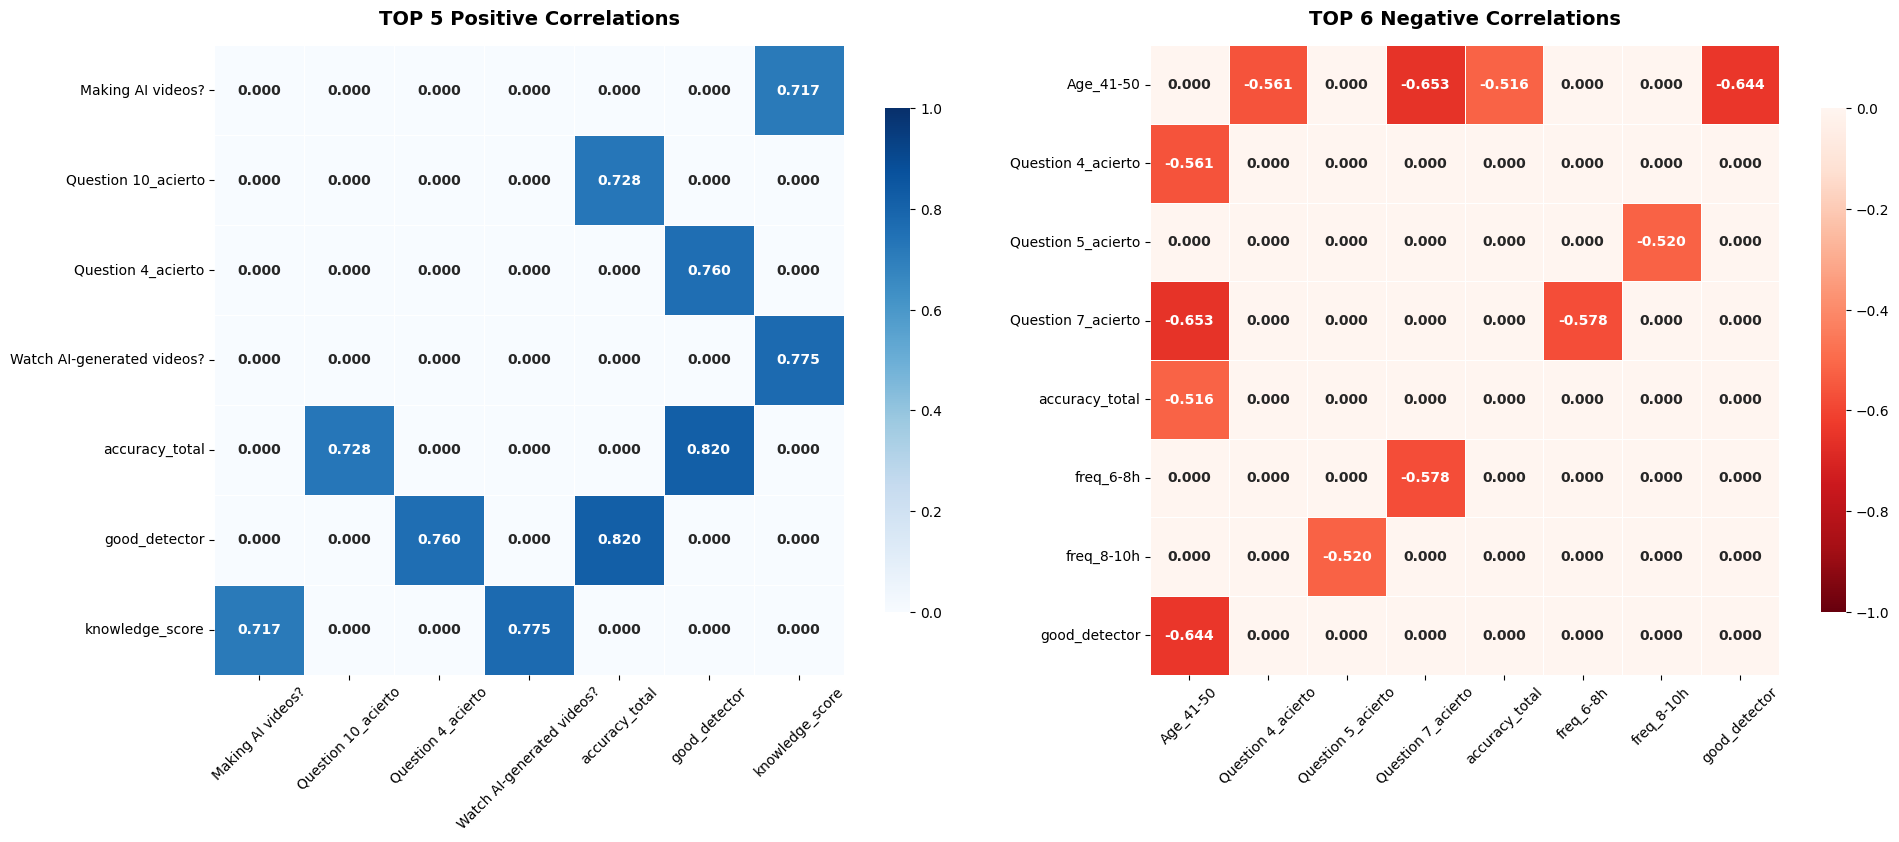

In [136]:
# Separar en positivas y negativas para mejor visualización
corr_positivas = {
    ('accuracy_total', 'good_detector'): 0.820,
    ('knowledge_score', 'Watch AI-generated videos?'): 0.775,
    ('Question 4_acierto', 'good_detector'): 0.760,
    ('accuracy_total', 'Question 10_acierto'): 0.728,
    ('knowledge_score', 'Making AI videos?'): 0.717
}

corr_negativas = {
    ('Age_41-50', 'Question 7_acierto'): -0.653,
    ('Age_41-50', 'good_detector'): -0.644,
    ('Question 7_acierto', 'freq_6-8h'): -0.578,
    ('Question 4_acierto', 'Age_41-50'): -0.561,
    ('Question 5_acierto', 'freq_8-10h'): -0.520,
    ('Age_41-50', 'accuracy_total'): -0.516
}

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Función para crear matriz
def crear_matriz_corr(corr_dict, variables_orden=None):
    if variables_orden is None:
        variables = set()
        for (var1, var2) in corr_dict.keys():
            variables.add(var1)
            variables.add(var2)
        variables = sorted(list(variables))
    else:
        variables = variables_orden
    
    matrix = pd.DataFrame(np.zeros((len(variables), len(variables))), 
                         index=variables, columns=variables)
    
    for (var1, var2), valor in corr_dict.items():
        matrix.loc[var1, var2] = valor
        matrix.loc[var2, var1] = valor
    
    return matrix

# Heatmap correlaciones positivas
matrix_pos = crear_matriz_corr(corr_positivas)
sns.heatmap(matrix_pos, 
            cmap="Blues", 
            annot=True, 
            fmt=".3f", 
            ax=ax1,
            annot_kws={"size": 10, "weight": "bold"},
            cbar_kws={"shrink": 0.8},
            linewidths=0.5,
            linecolor='white',
            square=True,
            vmin=0, vmax=1)

ax1.set_title("TOP 5 Positive Correlations", fontsize=14, fontweight='bold', pad=15)
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', rotation=0)

# Heatmap correlaciones negativas
matrix_neg = crear_matriz_corr(corr_negativas)
sns.heatmap(matrix_neg, 
            cmap="Reds_r", 
            annot=True, 
            fmt=".3f", 
            ax=ax2,
            annot_kws={"size": 10, "weight": "bold"},
            cbar_kws={"shrink": 0.8},
            linewidths=0.5,
            linecolor='white',
            square=True,
            vmin=-1, vmax=0)
ax2.set_title("TOP 6 Negative Correlations", fontsize=14, fontweight='bold', pad=15)
ax2.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

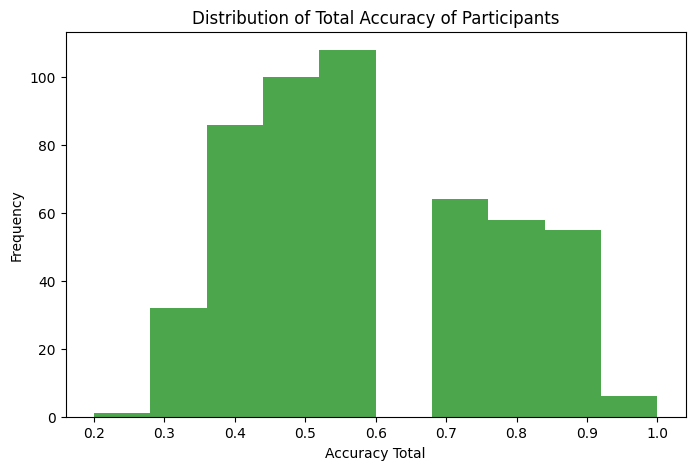

In [126]:
plt.figure(figsize=(8, 5))
plt.hist(df["accuracy_total"], bins=10, color="green", alpha=0.7)
plt.xlabel("Accuracy Total")
plt.ylabel("Frequency")
plt.title("Distribution of Total Accuracy of Participants")
plt.show()


In [113]:
df.columns.to_list()


['Time(sec)',
 'know about AI-generated videos?',
 'Watch AI-generated videos?',
 'Making AI videos?',
 'Age_18-25',
 'Age_26-30',
 'Age_31-40',
 'Age_41-50',
 'freq_2-4h',
 'freq_4-6h',
 'freq_6-8h',
 'freq_8-10h',
 'more 10h',
 'rrss_Facebook',
 'rrss_Instagram',
 'rrss_Otras',
 'rrss_Tiktok',
 'rrss_Whatsapp',
 'rrss_X',
 'Question 1_acierto',
 'Question 2_acierto',
 'Question 3_acierto',
 'Question 4_acierto',
 'Question 5_acierto',
 'Question 6_acierto',
 'Question 7_acierto',
 'Question 8_acierto',
 'Question 9_acierto',
 'Question 10_acierto',
 'accuracy_total',
 'good_detector']

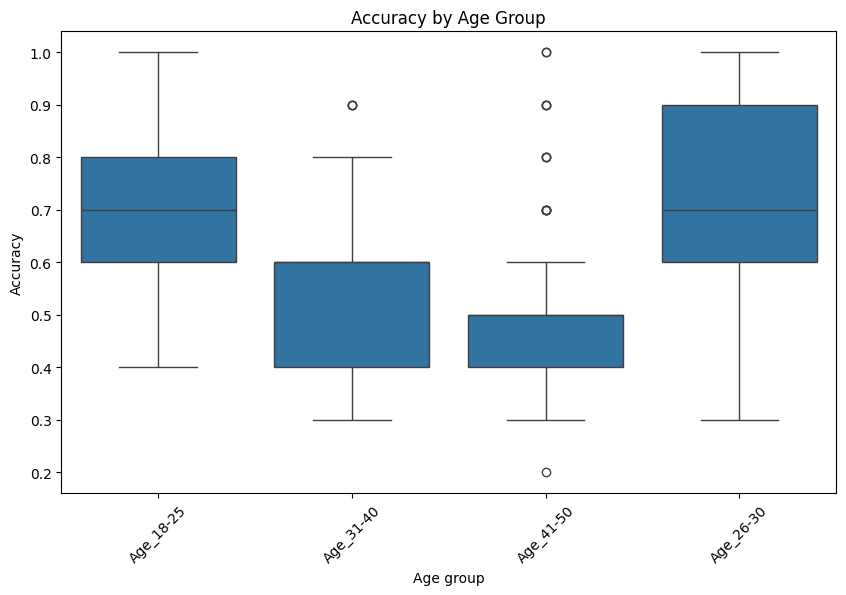

In [125]:
import seaborn as sns

edad_cols = [
    'Age_18-25',
    'Age_26-30',
    'Age_31-40',
    'Age_41-50'
]

df_edades = df.copy()
df_edades["grupo_edad"] = df_edades[edad_cols].idxmax(axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(x="grupo_edad", y="accuracy_total", data=df_edades)
plt.xticks(rotation=45)
plt.title("Accuracy by Age Group")
plt.xlabel("Age group")
plt.ylabel("Accuracy")
plt.show()


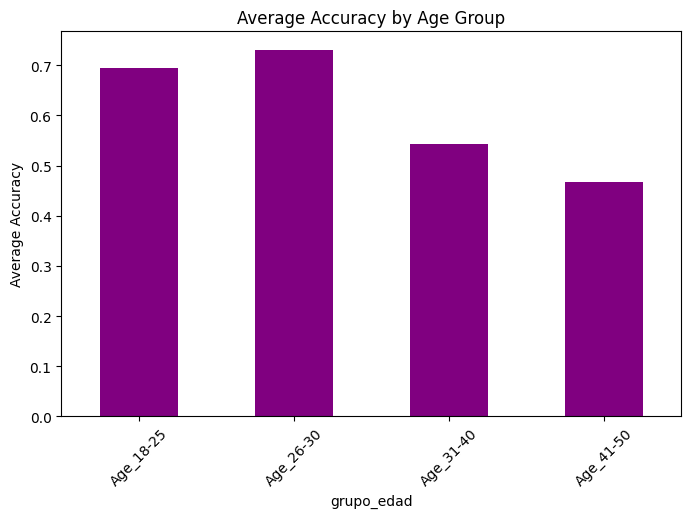

In [124]:
mean_acc_by_age = df_edades.groupby("grupo_edad")["accuracy_total"].mean()

plt.figure(figsize=(8, 5))
mean_acc_by_age.plot(kind="bar", color="purple")
plt.ylabel("Average Accuracy")
plt.title("Average Accuracy by Age Group")
plt.xticks(rotation=45)
plt.show()

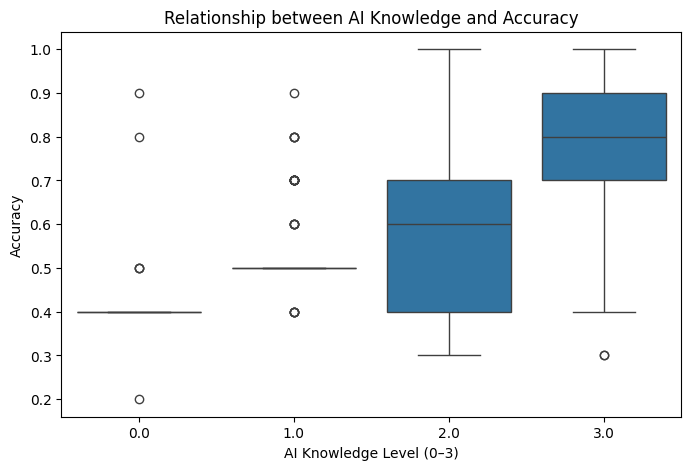

In [123]:
df["knowledge_score"] = df[[
    'know about AI-generated videos?',
    'Watch AI-generated videos?',
    'Making AI videos?'
]].sum(axis=1)

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["knowledge_score"], y=df["accuracy_total"])
plt.title("Relationship between AI Knowledge and Accuracy")
plt.xlabel("AI Knowledge Level (0–3)")
plt.ylabel("Accuracy")
plt.show()


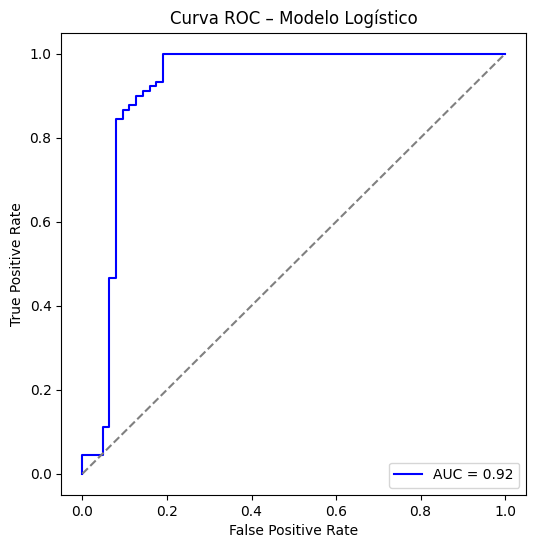

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistics Model")
plt.legend()
plt.show()


C:\Users\Ulices Machine\AppData\Local\Temp\ipykernel_24228\3212531822.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="grupo_rrss", y="accuracy_total", data=df_rrss, palette="viridis")


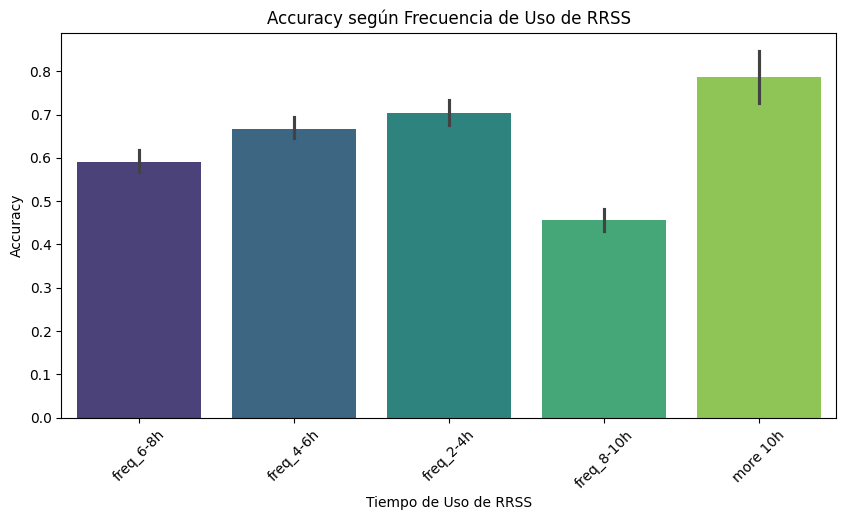

In [ ]:
rrss_use_cols = [
    'freq_2-4h',
    'freq_4-6h',
    'freq_6-8h',
    'freq_8-10h',
    'more 10h'
]

df_rrss = df.copy()
df_rrss["grupo_rrss"] = df_rrss[rrss_use_cols].idxmax(axis=1)

plt.figure(figsize=(10, 5))
sns.barplot(x="grupo_rrss", y="accuracy_total", data=df_rrss, palette="viridis")
plt.xticks(rotation=45)
plt.title("Accuracy based on frequency of social media use")
plt.xlabel("Time Spent on Social Media")
plt.ylabel("Accuracy")
plt.show()


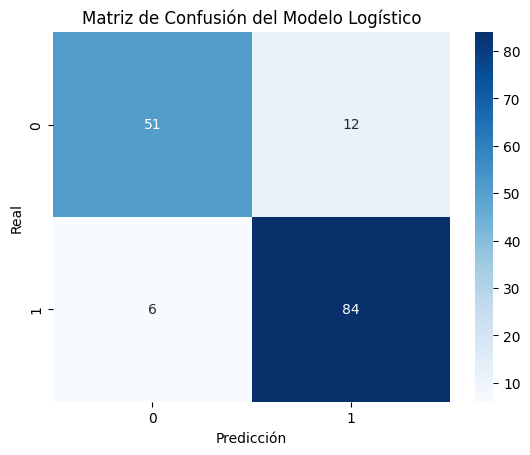

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, model.predict(X_test))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix of the Logistic Model")
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.show()


In [120]:
len(df.columns.to_list())

32

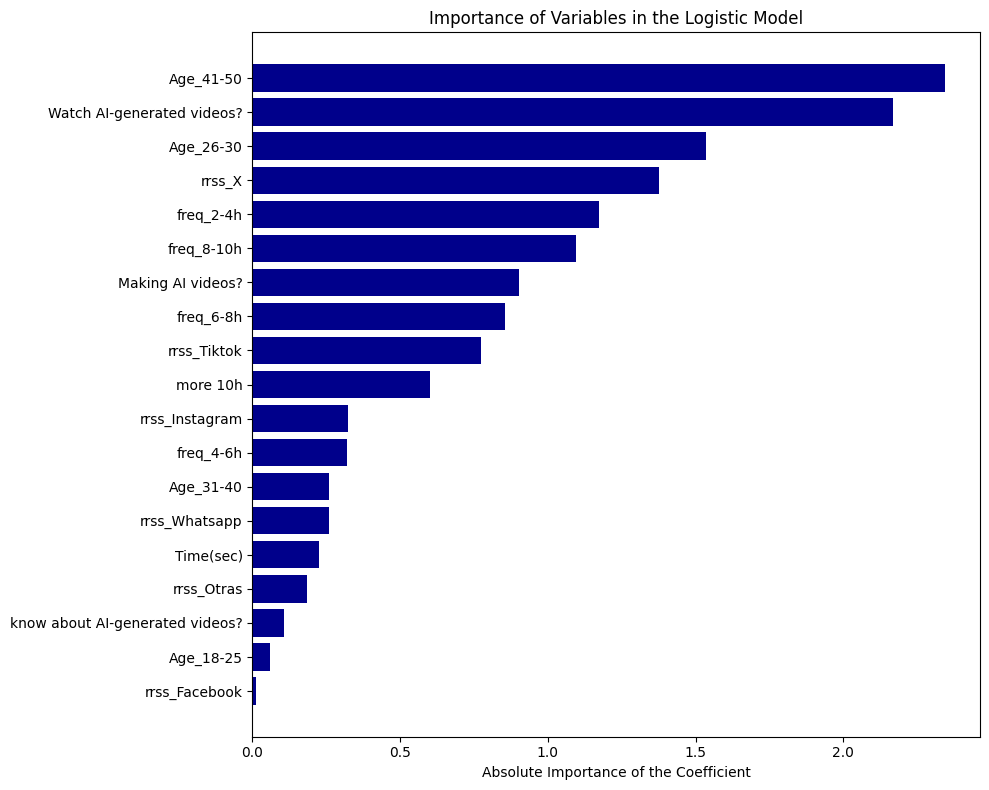

In [122]:
import matplotlib.pyplot as plt
import numpy as np

columns_names=['Time(sec)',
 'know about AI-generated videos?',
 'Watch AI-generated videos?',
 'Making AI videos?',
 'Age_18-25',
 'Age_26-30',
 'Age_31-40',
 'Age_41-50',
 'freq_2-4h',
 'freq_4-6h',
 'freq_6-8h',
 'freq_8-10h',
 'more 10h',
 'rrss_Facebook',
 'rrss_Instagram',
 'rrss_Otras',
 'rrss_Tiktok',
 'rrss_Whatsapp',
 'rrss_X',
 'Question 1_acierto',
 'Question 2_acierto',
 'Question 3_acierto',
 'Question 4_acierto',
 'Question 5_acierto',
 'Question 6_acierto',
 'Question 7_acierto',
 'Question 8_acierto',
 'Question 9_acierto',
 'Question 10_acierto']
# Coeficientes del modelo
coef_df = pd.DataFrame({
    "variable": coeficientes["variable"],  # Asegúrate de que column_names tenga los nombres correctos
    "coeficiente": model.coef_[0],
    "impacto_absoluto": np.abs(model.coef_[0])
}).sort_values(by="impacto_absoluto", ascending=False)

# Gráfico de barras horizontal de coeficientes
plt.figure(figsize=(10, 8))
plt.barh(coef_df["variable"], coef_df["impacto_absoluto"], color="darkblue")
plt.xlabel("Absolute Importance of the Coefficient")
plt.title("Importance of Variables in the Logistic Model")
plt.gca().invert_yaxis()  # Para mostrar la variable más importante arriba
plt.tight_layout()
plt.show()


In [63]:
model.coef_[0]

array([ 0.1035113 ,  2.1779751 ,  0.90412673,  0.05486098,  1.54086632,
        0.2589163 , -2.34719705,  1.17110943, -0.32002677, -0.86534213,
       -1.074615  ,  0.59632101, -0.01733171,  0.32257532,  0.18861695,
       -0.7814146 , -0.25138117,  1.39145864,  0.20606481])

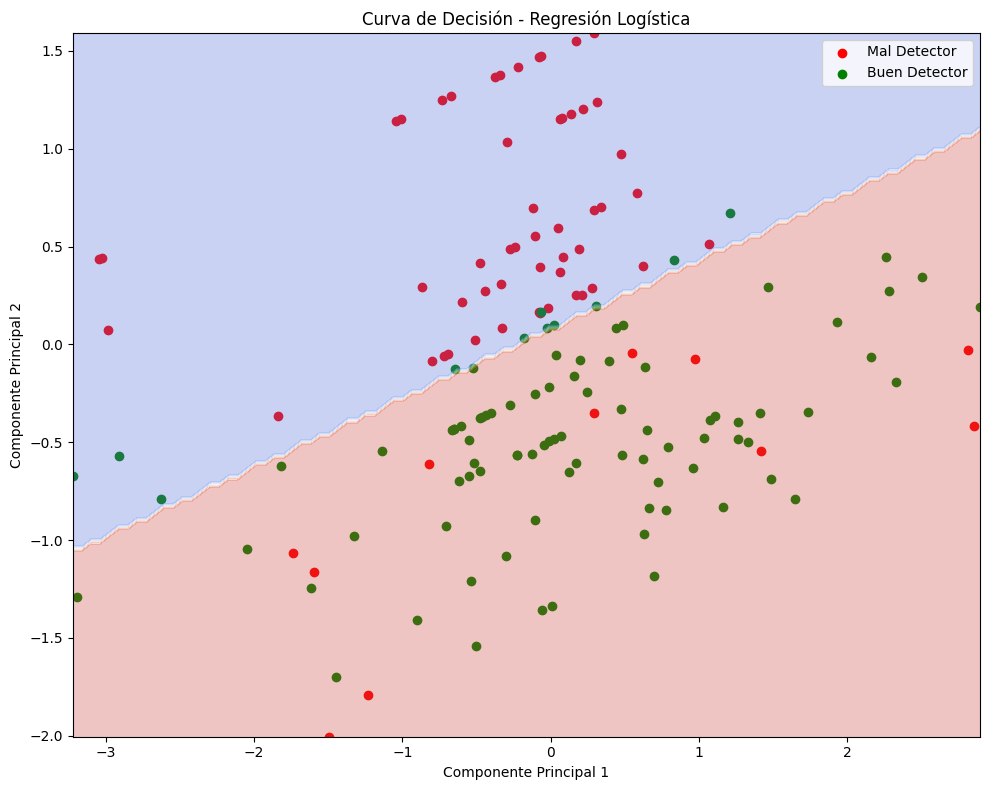

In [68]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Aplicar PCA solo a los datos de entrenamiento y prueba
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Predicciones del modelo sobre el conjunto de test
y_pred = model.predict(X_test)

# Crear el gráfico de la curva de decisión
plt.figure(figsize=(10, 8))

# Puntos de la clase 0 (mal detector)
plt.scatter(X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1], color='red', label='Mal Detector')

# Puntos de la clase 1 (buen detector)
plt.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], color='green', label='Buen Detector')

# Crear una malla de puntos para graficar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(X_test_pca[:, 0].min(), X_test_pca[:, 0].max(), 100),
                     np.linspace(X_test_pca[:, 1].min(), X_test_pca[:, 1].max(), 100))

# Clasificar los puntos de la malla
Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Dibujar la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Etiquetas y título
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Curva de Decisión - Regresión Logística")
plt.legend()
plt.tight_layout()
plt.show()